<a href="https://colab.research.google.com/github/aashitagloria/python_class/blob/main/Most_used_beauty_and_cosmetic_products_2024_python_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Python Programming for Business Analytics FINAL Project*

---




***BEAUTY AND COSMETIC PRODUCT ANALYSIS 2024 DATASET💄***

1. Loading the dataset

In [3]:
import pandas as pd

# Loading the dataset and specifying the path
file_path = "most_used_beauty_cosmetics_products_extended.csv"
df = pd.read_csv(file_path)

# Displaying the first 5 rows of the dataset to understand the different columns
df.head()



,Product_Name,Brand,Category,Usage_Frequency,Price_USD,Rating,Number_of_Reviews,Product_Size,Skin_Type,Gender_Target,Packaging_Type,Main_Ingredient,Cruelty_Free,Country_of_Origin
0,Ultra Face Mask,Drunk Elephant,Blush,Weekly,67.85,1.4,686,30ml,Sensitive,Female,Tube,Retinol,False,Australia
1,Ultra Lipstick,Laura Mercier,Makeup Remover,Occasional,116.43,4.2,5483,250ml,Dry,Unisex,Bottle,Shea Butter,False,UK
2,Ultra Serum,Natasha Denona,Highlighter,Daily,90.84,1.6,5039,100ml,Sensitive,Male,Compact,Aloe Vera,True,Italy
3,Divine Serum,Ilia Beauty,Face Mask,Occasional,55.17,3.2,6202,250ml,Normal,Male,Tube,Glycerin,True,South Korea
4,Super Foundation,Charlotte Tilbury,Highlighter,Occasional,140.56,1.7,297,100ml,Oily,Female,Compact,Glycerin,False,Germany


2. Checking Missing values and Overall Summary

In [ ]:
# Check for missing values and basic stats
df.info()

# Summary statistics of the dataset
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product_Name       15000 non-null  object 
 1   Brand              15000 non-null  object 
 2   Category           15000 non-null  object 
 3   Usage_Frequency    15000 non-null  object 
 4   Price_USD          15000 non-null  float64
 5   Rating             15000 non-null  float64
 6   Number_of_Reviews  15000 non-null  int64  
 7   Product_Size       15000 non-null  object 
 8   Skin_Type          15000 non-null  object 
 9   Gender_Target      15000 non-null  object 
 10  Packaging_Type     15000 non-null  object 
 11  Main_Ingredient    15000 non-null  object 
 12  Cruelty_Free       15000 non-null  bool   
 13  Country_of_Origin  15000 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(10)
memory usage: 1.5+ MB


,Price_USD,Rating,Number_of_Reviews
count,15000.000000,15000.000000,15000.000000
mean,80.134108,3.002327,5014.231333
std,40.402983,1.168029,2855.665464
min,10.000000,1.000000,52.000000
25%,45.480000,2.000000,2562.000000
50%,80.040000,3.000000,5002.000000
75%,114.760000,4.000000,7497.000000
max,149.990000,5.000000,10000.000000


BASIC OPERATIONS

In [ ]:
# Top 5 most expensive products
top_expensive_products = df.nlargest(5, "Price_USD")
top_expensive_products

,Product_Name,Brand,Category,Usage_Frequency,Price_USD,Rating,Number_of_Reviews,Product_Size,Skin_Type,Gender_Target,Packaging_Type,Main_Ingredient,Cruelty_Free,Country_of_Origin
11484,Ultra Eyeliner,Huda Beauty,BB Cream,Weekly,149.99,4.1,1770,150ml,Oily,Unisex,Compact,Hyaluronic Acid,True,South Korea
5958,Magic Mascara,Danessa Myricks,Bronzer,Occasional,149.98,3.6,8703,150ml,Combination,Unisex,Stick,Glycerin,True,USA
10363,Perfect CC Cream,Hourglass,Powder,Weekly,149.97,3.9,7806,150ml,Sensitive,Unisex,Compact,Salicylic Acid,False,USA
12667,Perfect Lip Liner,Laura Mercier,Bronzer,Daily,149.97,4.8,2239,150ml,Oily,Male,Tube,Glycerin,False,Japan
7551,Magic Blush,Hourglass,Moisturizer,Daily,149.93,1.3,6228,200ml,Oily,Male,Tube,Vitamin C,True,South Korea


In [ ]:
# Top 5 highest-rated products
top_rated_products = df.nlargest(5, "Rating")
top_rated_products

,Product_Name,Brand,Category,Usage_Frequency,Price_USD,Rating,Number_of_Reviews,Product_Size,Skin_Type,Gender_Target,Packaging_Type,Main_Ingredient,Cruelty_Free,Country_of_Origin
242,Divine Bronzer,Farsali,Foundation,Occasional,103.00,5.0,9904,30ml,Dry,Unisex,Stick,Vitamin C,True,Australia
409,Ultra Bronzer,Ilia Beauty,Serum,Monthly,28.05,5.0,4094,100ml,Combination,Male,Tube,Hyaluronic Acid,True,South Korea
709,Divine Face Oil,Tarte,Mascara,Monthly,142.37,5.0,6978,50ml,Oily,Female,Spray,Shea Butter,False,Australia
710,Perfect Lip Liner,RMS Beauty,Lip Gloss,Daily,81.91,5.0,1194,200ml,Dry,Female,Bottle,Hyaluronic Acid,True,France
749,Magic Moisturizer,Patrick Ta,Mascara,Daily,63.81,5.0,4037,150ml,Combination,Male,Bottle,Retinol,True,Australia


In [ ]:
# Average price and rating per category
category_stats = df.groupby("Category").agg(
    avg_price=("Price_USD", "mean"),
    avg_rating=("Rating", "mean"),
    count=("Product_Name", "count")
).sort_values(by="avg_price", ascending=False)
category_stats

,avg_price,avg_rating,count
Category,,,
Exfoliator,83.010669,3.048542,583
Blush,82.290573,2.979936,628
Makeup Remover,81.807123,3.001887,636
Eye Shadow,81.662577,2.947423,582
Moisturizer,81.584718,3.079467,638
Face Mask,81.508851,3.015314,653
Highlighter,81.433430,3.030168,653
Bronzer,81.363835,2.982092,631
Lipstick,81.105387,2.924487,633


In [ ]:
# Average price of cruelty-free vs. non-cruelty-free products
cruelty_free_stats = df.groupby("Cruelty_Free")["Price_USD"].mean()
cruelty_free_stats

,Price_USD
Cruelty_Free,
False,80.043303
True,80.227168


In [ ]:
# Countries producing the highest-rated products
top_countries = df.groupby("Country_of_Origin")["Rating"].mean().sort_values(ascending=False)
top_countries

,Rating
Country_of_Origin,
Japan,3.035089
France,3.012292
South Korea,3.012048
UK,3.007801
USA,2.999586
Italy,2.998352
Germany,2.997381
Australia,2.956647


3. UNDERSTANDING THE PRODUCT CATEGORY DISTRIBUTION THROUGH A SIMPLE  BAR CHART

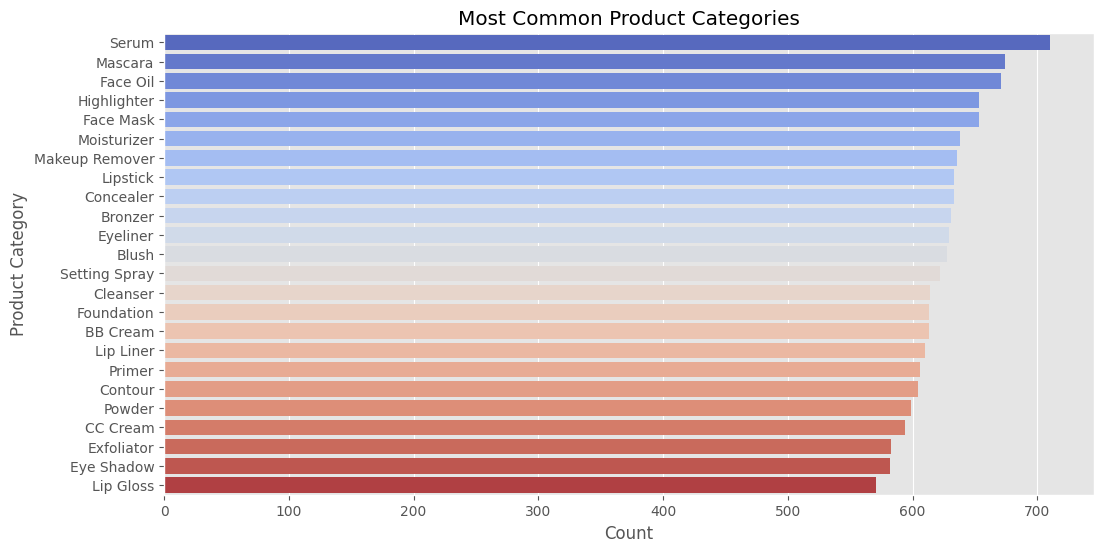

In [ ]:
import warnings
warnings.filterwarnings("ignore") # Ignoring warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Seting the style
plt.style.use("ggplot")

# Bar Chart: Most Common Product Categories
plt.figure(figsize=(12, 6))
sns.countplot(y=df["Category"], order=df["Category"].value_counts().index, palette='coolwarm')
plt.xlabel("Count")
plt.ylabel("Product Category")
plt.title("Most Common Product Categories")
plt.show()

Analysis: The dataset shows a wide variety of product categories, with skin care products leading in popularity. Categories like hair care, makeup, and fragrance also have a significant presence.

Actionable insight:
1. Product bundling for profit optimization: From the top sold Beauty product  cateogry visulation, we can create bundle offers (Beauty kit) by identifying products that are frequently bought together. This will help the beauty and cosmetic business to recommend product bundles based on customer preferences by pushing them to buy more products.

In [ ]:
4. UNDERSTANDING THE PRICE DISTRIBUTION THROUGH A HISTOGRAM

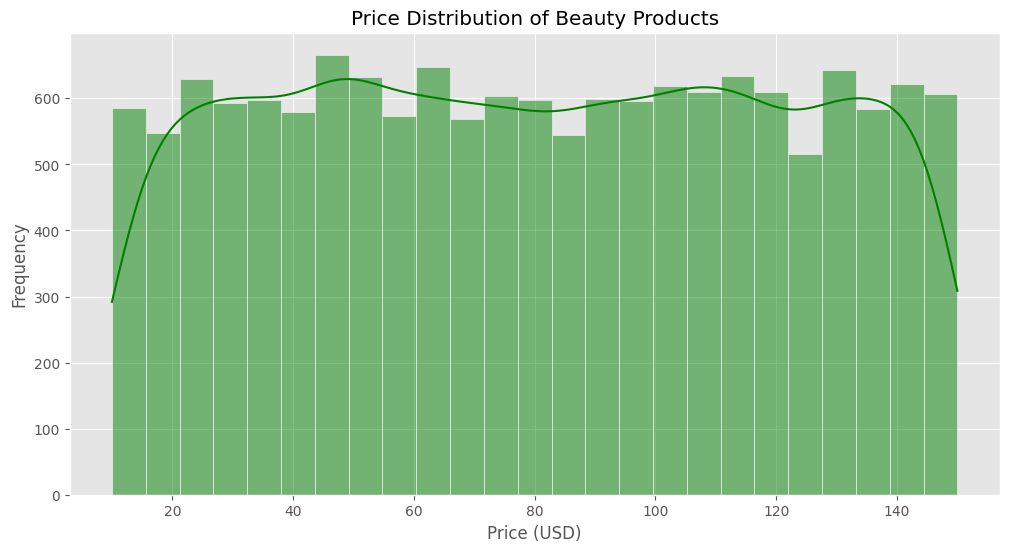

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Price_USD'], kde=True, color='green')
plt.title('Price Distribution of Beauty Products')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Analysis: The price of beauty products varies widely, with the majority of products priced under $100 USD. There are outliers with extremely high prices, particularly for luxury or premium versions of products.

Actionable insight:
1. Customer segmentation: The beauty and cosmetic business can perform customer segmentation for customers who are willing to pay a premimum price for certain products, spending them specific marketing campagins

5. UNDERSTANDING THE RATING DISTRIBUTION OF BEAUTY PRODUCTS THROUGHT A HISTOGRAM

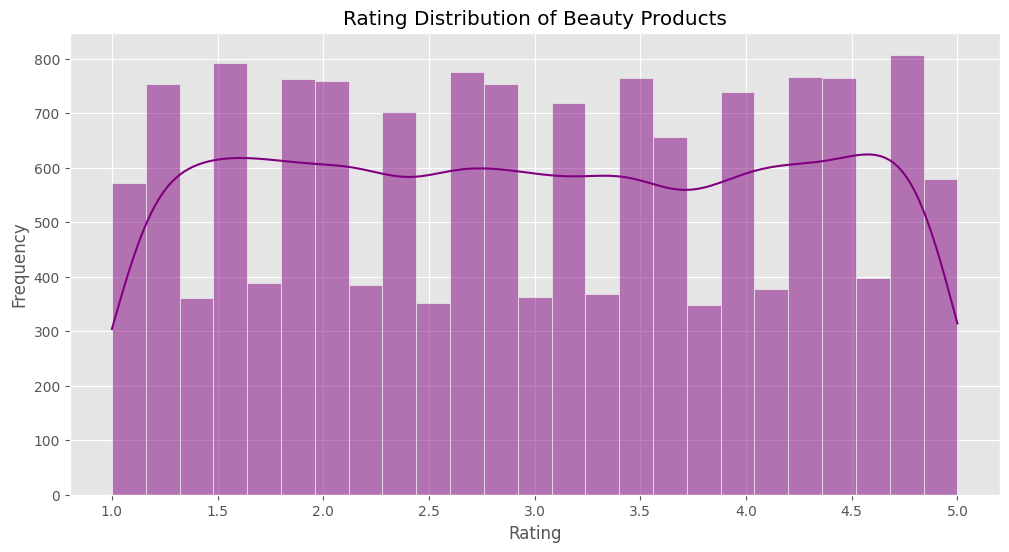

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Rating'], kde=True, color='purple')
plt.title('Rating Distribution of Beauty Products')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Analysis: Most products have a high average rating between 4 and 5 stars. This indicates that customers are generally satisfied with the beauty products in this dataset.

Actionable insight:
1. Feature top rated products in marketing campaigns: This will enchance consumer trust and will encourage the formation of a community of likeminded consumers to make purchasing decisions

6. UNDERSTANDING THE CORRELATION BETWEEN NUMBER OF REVIEWS AND PRICE THROUGH A SCATTERPLOT

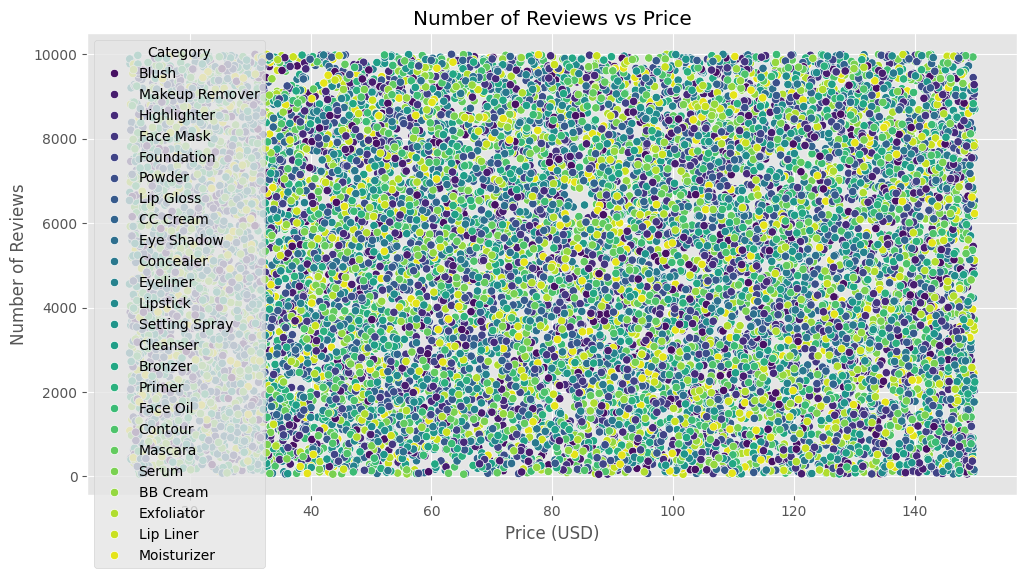

In [ ]:
# Scatter Plot: Number of reviews vs. Price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Price_USD', y='Number_of_Reviews', data=df, hue='Category', palette='viridis')
plt.title('Number of Reviews vs Price')
plt.xlabel('Price (USD)')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

Analysis: There is no strong correlation between price and the number of reviews. However, some lower-priced products receive a high number of reviews, indicating affordability may lead to wider usage and feedback.

Actionable insight: None

In [ ]:
7. UNDERSTANDING Price Distribution Across Different Product Categories throught a BOXPLOT

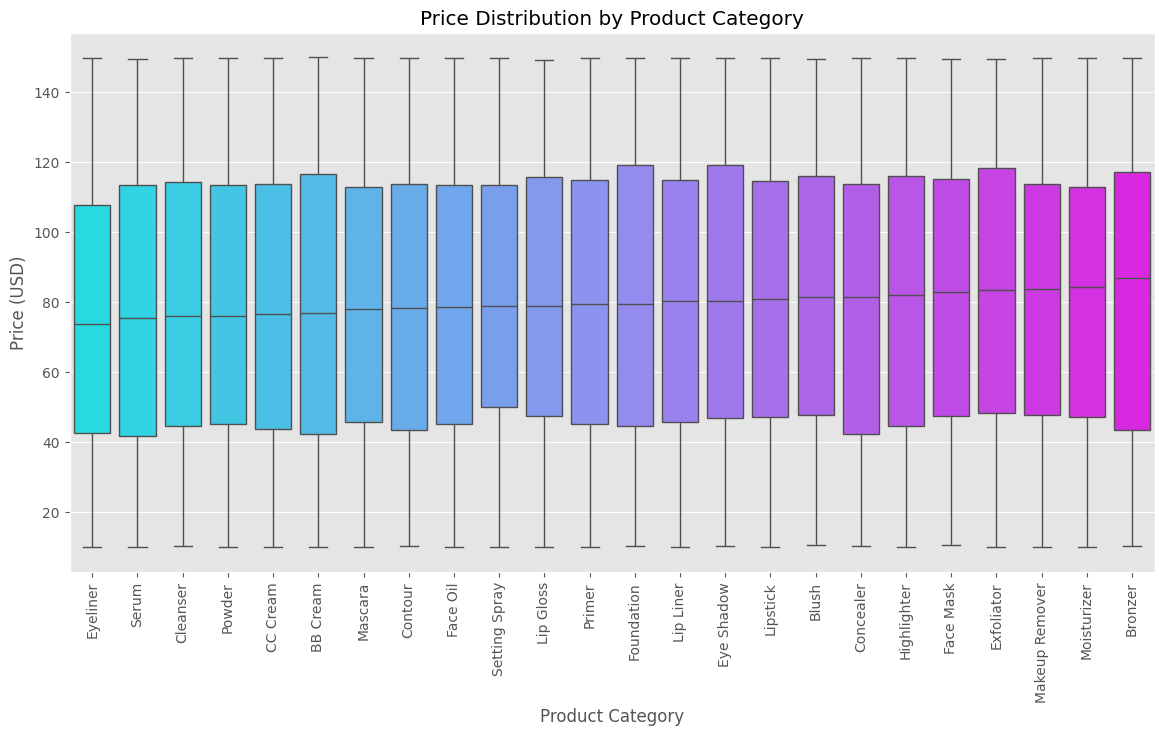

In [ ]:
plt.figure(figsize=(14, 7))
sns.boxplot(x="Category", y="Price_USD", data=df, order=df.groupby("Category")["Price_USD"].median().sort_values().index, palette='cool')
plt.xticks(rotation=90)
plt.xlabel("Product Category")
plt.ylabel("Price (USD)")
plt.title("Price Distribution by Product Category")
plt.show()

8. UNDERSTANDING THE AVERAGE RATING BY TOP PERFORMING BRANDS

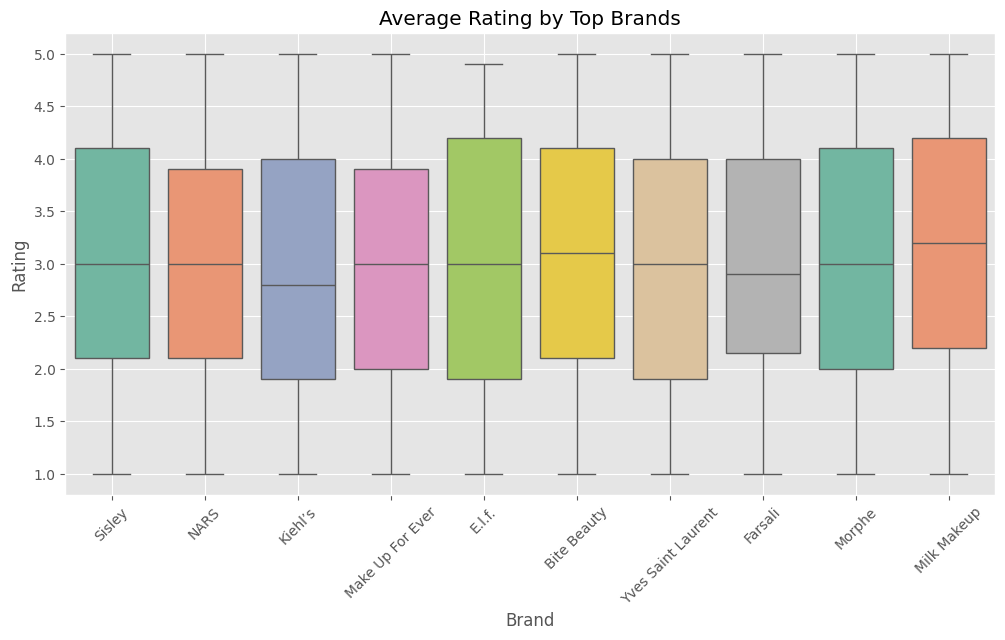

In [ ]:
top_brands = df['Brand'].value_counts().head(10).index
top_brand_data = df[df['Brand'].isin(top_brands)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Brand', y='Rating', data=top_brand_data, palette='Set2')
plt.title('Average Rating by Top Brands')
plt.xlabel('Brand')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

9. UNDERSTANDING THE PRODUCT SIZE DISTRIBUTION

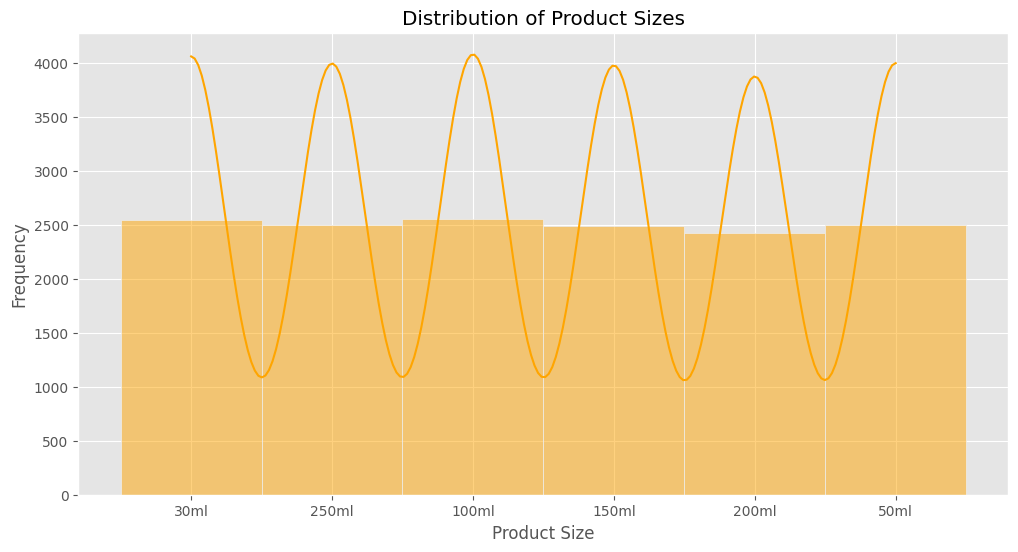

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Product_Size'], kde=True, color='orange')
plt.title('Distribution of Product Sizes')
plt.xlabel('Product Size')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

10. PERFORMING GENDER TARGET ANALYSIS

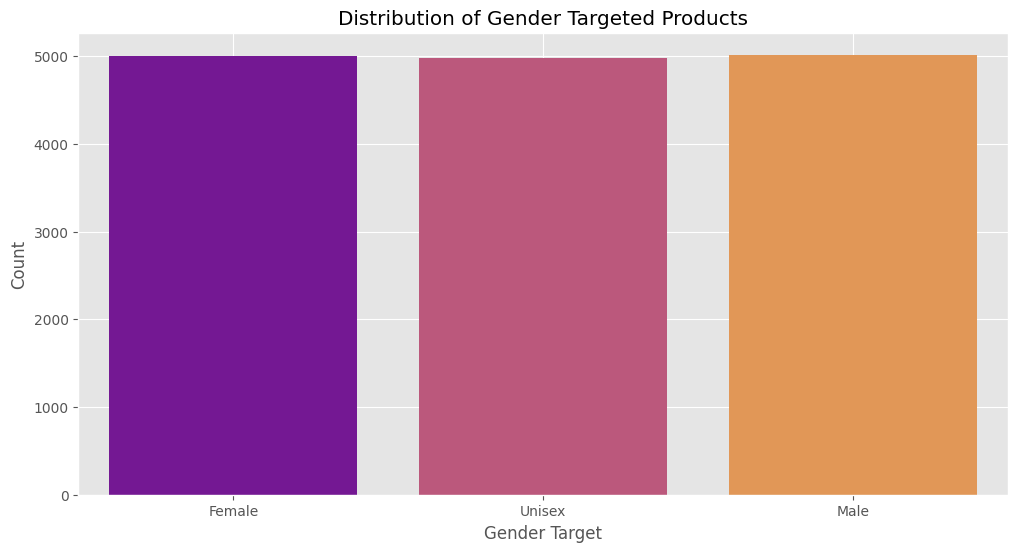

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Gender_Target', data=df, palette='plasma')
plt.title('Distribution of Gender Targeted Products')
plt.xlabel('Gender Target')
plt.ylabel('Count')
plt.grid(True)
plt.show()

11. ANALYSING CRUELITY FREE DISTRIBUTION OF PRODUCTS

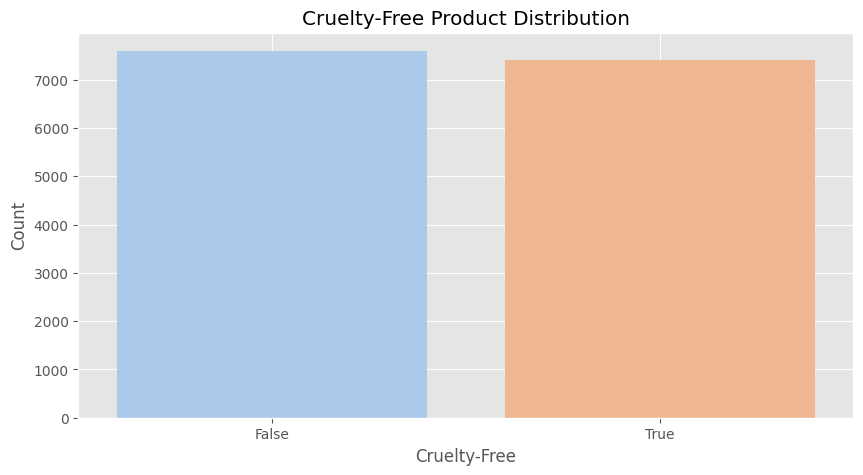

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Cruelty_Free', data=df, palette='pastel')
plt.title('Cruelty-Free Product Distribution')
plt.xlabel('Cruelty-Free')
plt.ylabel('Count')
plt.grid(True)
plt.show()

12. UNDERSTANDING AVERAGE RATING BY SKIN TYPE

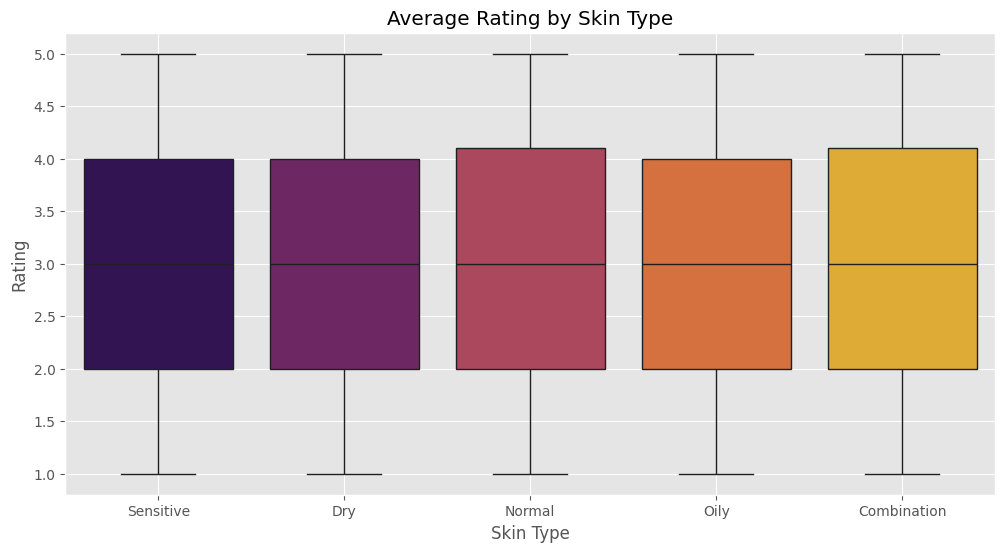

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Skin_Type', y='Rating', data=df, palette='inferno')
plt.title('Average Rating by Skin Type')
plt.xlabel('Skin Type')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

13. UNDERSTANDING DISTRIBUTION OF USAGE FREQUENCY

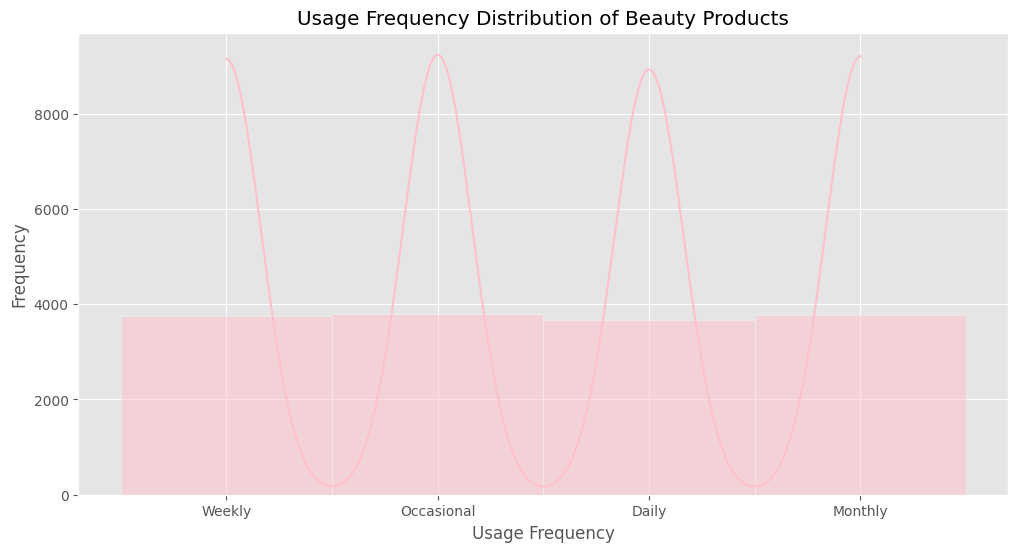

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Usage_Frequency'], kde=True, color='pink')
plt.title('Usage Frequency Distribution of Beauty Products')
plt.xlabel('Usage Frequency')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

14. ANALYSING TOP BRANDS BY NUMBER OF PRODUCTS

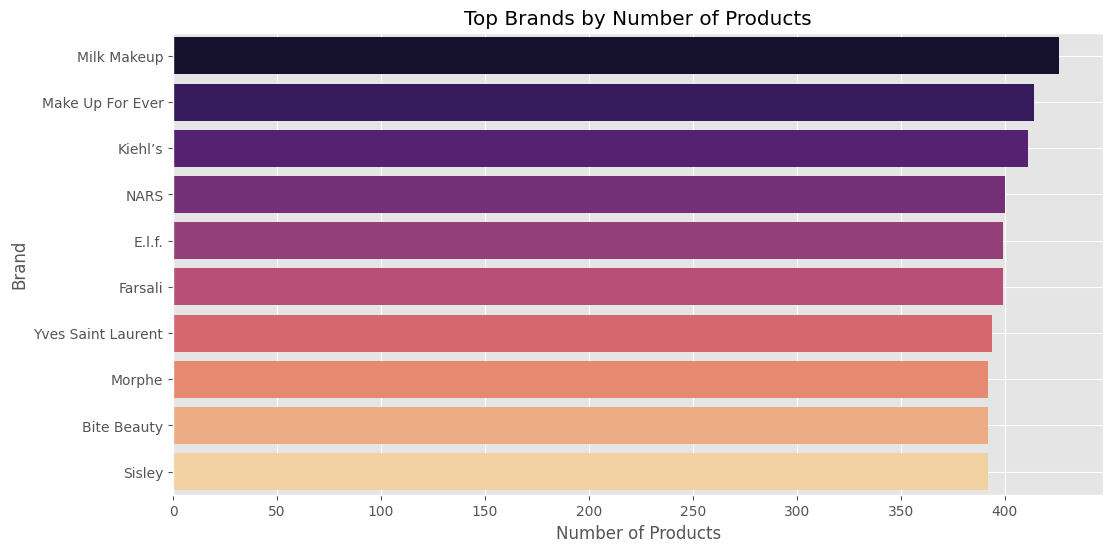

In [ ]:
plt.figure(figsize=(12, 6))
top_brands_count = df['Brand'].value_counts().head(10)
sns.barplot(x=top_brands_count.values, y=top_brands_count.index, palette='magma')
plt.title('Top Brands by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Brand')
plt.grid(True)
plt.show()

15. UNDERSTANDING NUMBER OF PRODUCTS BY COUNTRY OF ORIGIN

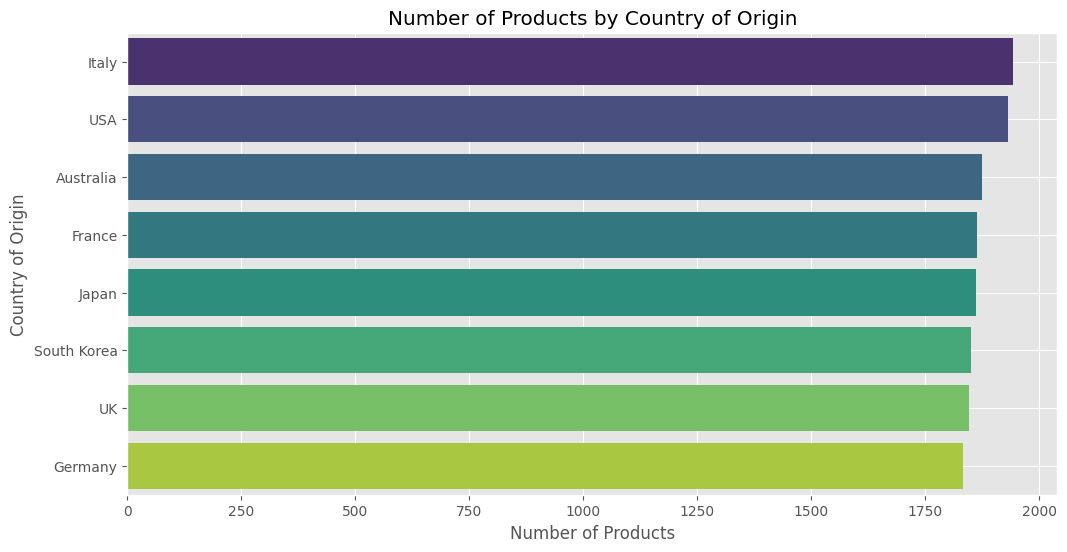

In [ ]:
plt.figure(figsize=(12, 6))
top_countries = df['Country_of_Origin'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Number of Products by Country of Origin')
plt.xlabel('Number of Products')
plt.ylabel('Country of Origin')
plt.grid(True)
plt.show()

16. UNDERSTANDING THE MOST COMMON PRIMARY INGREDIENTS IN PRODUCT DISTRIBUTION

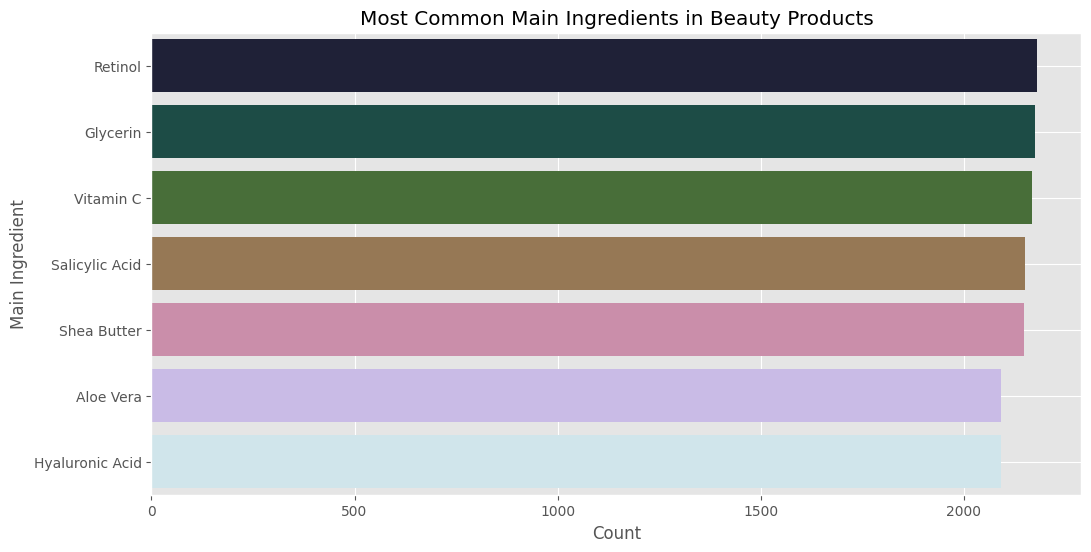

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Main_Ingredient', data=df, palette='cubehelix', order=df['Main_Ingredient'].value_counts().head(10).index)
plt.title('Most Common Main Ingredients in Beauty Products')
plt.ylabel('Main Ingredient')
plt.xlabel('Count')
plt.grid(True)
plt.show()

17. CORRELATION MATRIX TO SEE RELATIONS BETWEEN THE NUMERIC COLUMNS

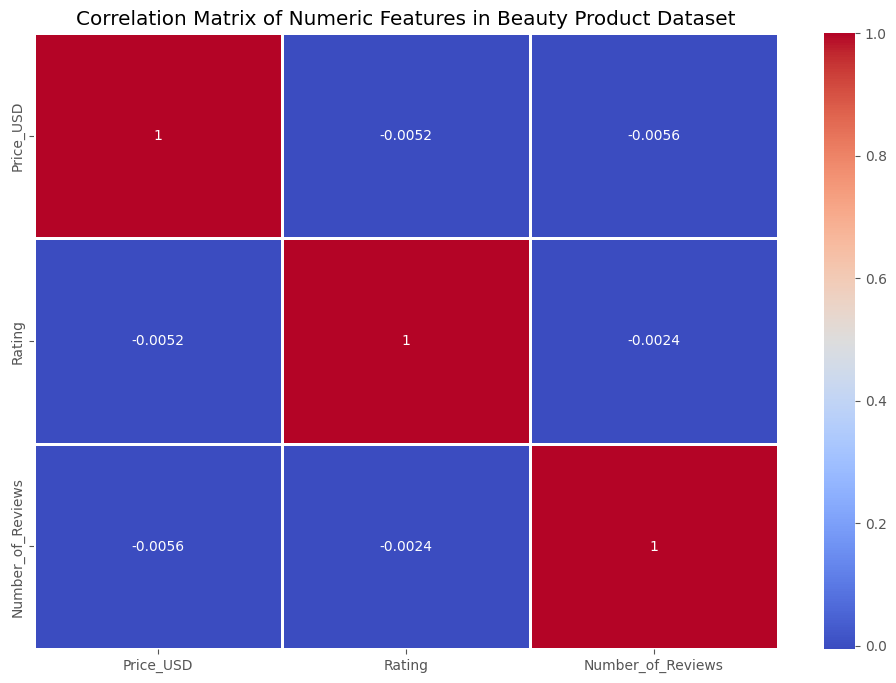

In [ ]:
# Selecting only the numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Creating the heatmap for the correlation matrix of numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=1)
plt.title('Correlation Matrix of Numeric Features in Beauty Product Dataset')
plt.show()

18. UNDERSTANDING THE SKIN TYPE DISTRIBUTION

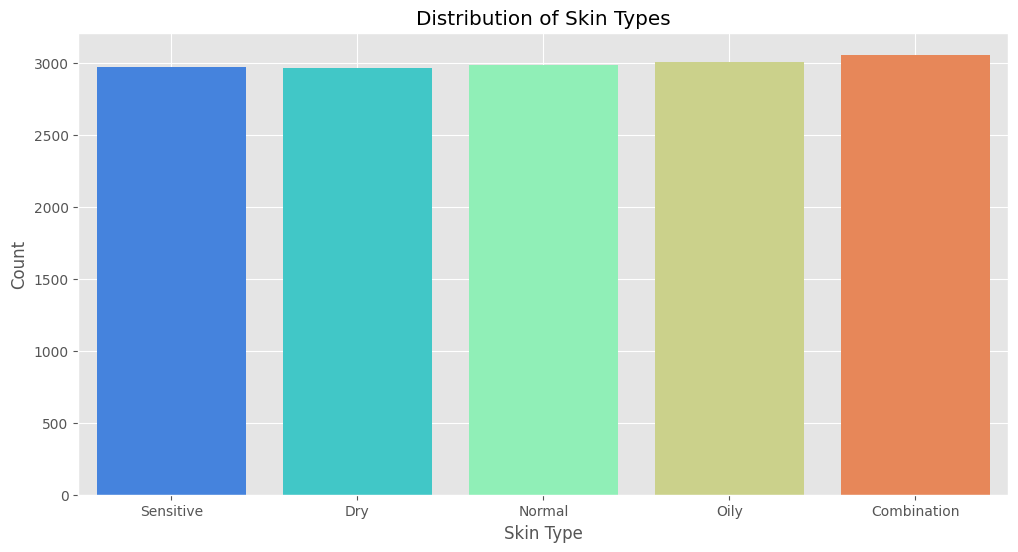

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Skin_Type', data=df, palette='rainbow')
plt.title('Distribution of Skin Types')
plt.xlabel('Skin Type')
plt.ylabel('Count')
plt.grid(True)
plt.show()

19. PRICE VS RATING FOR CRUETLY-FREE PRODUCTS

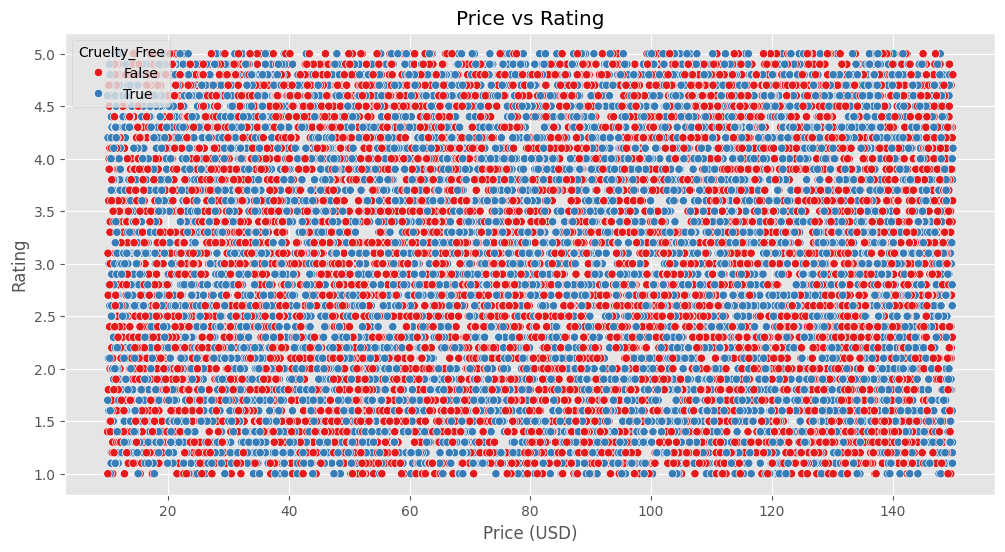

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Price_USD', y='Rating', data=df, hue='Cruelty_Free', palette='Set1')
plt.title('Price vs Rating')
plt.xlabel('Price (USD)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

Analysis: Price and Rating isn't essentially correlated

In [ ]:
!pip install sqlalchemy
!pip install ace_tools

20. SQL Integration

In [ ]:
from sqlalchemy import create_engine

# Create an in-memory SQLite database
engine = create_engine("sqlite:///:memory:")

# Store the processed dataset in the database
df.to_sql("beauty_products", con=engine, index=False, if_exists="replace")

# Query: Which product category has the highest average rating?
query_1 = """
SELECT Category, AVG(Rating) AS avg_rating
FROM beauty_products
GROUP BY Category
ORDER BY avg_rating DESC
LIMIT 5;
"""

# Query: Which brand has the most expensive products on average?
query_2 = """
SELECT Brand, AVG(Price_USD) AS avg_price
FROM beauty_products
GROUP BY Brand
ORDER BY avg_price DESC
LIMIT 5;
"""

# Query: Which country produces the highest-rated products on average?
query_3 = """
SELECT Country_of_Origin, AVG(Rating) AS avg_rating
FROM beauty_products
GROUP BY Country_of_Origin
ORDER BY avg_rating DESC
LIMIT 5;
"""

# Execute queries
top_categories_by_rating = pd.read_sql(query_1, con=engine)
top_brands_by_price = pd.read_sql(query_2, con=engine)
top_countries_by_rating = pd.read_sql(query_3, con=engine)

In [ ]:
# Displaying analyzed results
from IPython.display import display

print("\nTop 5 Categories by Average Rating:")
display(top_categories_by_rating)

print("\nTop 5 Most Expensive Brands:")
display(top_brands_by_price)

print("\nTop 5 Countries with Highest-Rated Products:")
display(top_countries_by_rating)



Top 5 Categories by Average Rating:


,Category,avg_rating
0,Contour,3.129305
1,Moisturizer,3.079467
2,CC Cream,3.073064
3,BB Cream,3.060359
4,Setting Spray,3.050161



Top 5 Most Expensive Brands:


,Brand,avg_price
0,Tarte,83.803934
1,Shiseido,83.706216
2,Juvia’s Place,83.160190
3,Kylie Cosmetics,82.698892
4,Fenty Beauty,82.688525



Top 5 Countries with Highest-Rated Products:


,Country_of_Origin,avg_rating
0,Japan,3.035089
1,France,3.012292
2,South Korea,3.012048
3,UK,3.007801
4,USA,2.999586


ACTIONABLE INSIGHTS AFTER ANALYSIS